In [197]:
import math
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from matplotlib.gridspec import GridSpec

# Parte A 

Durante el periodo de 1790 a 1930 la población de Estados Unidos $P(t)$ ($t$ en años) creció de 3.9 millones a 123.2 millones. 

En este lapso, $P(t)$ permaneció cercana a la solución del problema de valor inicial:

$$\frac{dP}{dt} = 0.03135P − 0.0001489P^2 \quad , \quad P(0) = 3.9$$

## Análisis del modelo logístico:
### Ecuación de población general:
Supóngase que la población cambia sólo por la ocurrencia de nacimientos y muertes —se considera que no hay inmigración o emigración de poblaciones de fuera o condiciones de tipo ambiental—. Es común tratar el crecimiento o disminución de una población en términos de funciones de las tasas de natalidad y mortalidad definidas como sigue:
 - $ \beta(t)$ es el número de nacimientos por unidad de población por unidad de tiempo en el tiempo t.
 - $\delta(t)$ es el número de muertes por unidad de población por unidad de tiempo en el tiempo t.
 Entonces, el número de nacimientos y muertes que se registran durante el intervalo
de tiempo $[t, t +\Delta t]$ está dado (aproximadamente) por
$$nacimientos: \beta (t) \cdot P(t) \cdot \Delta t  \hspace{1cm} muertes:\delta (t)\cdot P(t)\Delta t$$

Por tanto, el cambio $\Delta P$ en la población durante el intervalo de tiempo $[t, t +
\Delta t]$ de longitud $\Delta t$ es
$$\Delta P = [nacimientos] - [muertes] ≈ β(t) · P(t) · \Delta t − δ(t) · P(t) · \Delta t,$$
así
$$ \frac{\Delta P}{\Delta t}≈ [β(t) − δ(t)] P(t).$$

El error en esta aproximación debe tender a cero conforme $\Delta t \rightarrow  0$, para que —tomando el límite— se obtenga la ecuación diferencial

$$ \frac{dP}{dt}≈ [β − δ] P(t) \hspace{3cm} (1)$$
La ecuación (1) es la ecuación de población general. Si $\beta$ y $\delta$ son constantes, la ecuación (1) se reduce a la ecuación de crecimiento natural con $k = \beta - \delta$. Pero aquí se incluye también la posibilidad de que $\beta$ y $\delta$ sean funciones variables de t. Las tasas de nacimiento y mortalidad no necesitan conocerse de antemano; pueden depender de la función desconocida P(t).

### Poblaciones acotadas ecuación logística:
 Suponga que la tasa de nacimientos $\beta$ es una función lineal decreciente del tamaño de la población $P$, tal que $\beta = \beta_0 - \beta_1 \cdot P$, donde $\beta_0$ y $\beta_1$ son constantes positivas. Si la tasa de mortalidad $\delta = \delta_0$ permanece constante, entonces la ecuación (1) toma la forma



$$ \frac {dP}{dt}=( \beta_0 -\beta_1 P - \delta_0 )P $$

esto es,


$$\frac {dP}{dt}=aP-bP^2  \hspace{3cm}(2)$$

donde $a=\beta_0-\delta_0$ y $b=\beta_1$.

Si los coeficientes $a$ y $b$ son positivos, entonces la ecuación (2) se llama ecuación logística. Con el propósito de relacionar el comportamiento de la población $P(t)$ con los valores de los parámetros en la ecuación, es conveniente reescribir la ecuación logística en la forma
$$\frac {dP}{dt}=kP(M-P)\hspace{3cm}(3)$$
donde $k=b$ y $M=a/b$ son constantes.


### Poblaciones limitadas y capacidad máxima:
La solución al problema de valor incial (3) es:
$$P(t)=\frac {MP_0}{P_0+(M-P_0)e^{-kMt} }$$

### Análisis del comportamiento de poblaciones logísticas:

Las poblaciones reales de animales son valores positivos. Si $P_0 = M$, entonces la ecuación (3) se reduce a la "población de equilibrio", sin cambio (valores constantes) $P(t) = M$. De otra manera, el comportamiento de una población logística depende de si $0 < P_0 < M$ o $P_0 > M$.

**Caso 1:** Si $0 < P_0 < M$, entonces se observa de la solución que $P'(t) > 0$ y

$$P(t) = \frac{MP_0}{P_0 + (M - P_0)e^{-kMt}} = \frac{MP_0}{P_0 + \{\text{número pos.}\}} < \frac{MP_0}{P_0} = M$$

**Caso 2:** Sin embargo, si $P_0 > M$, entonces se observa que $P'(t) < 0$ y

$$P(t) = \frac{MP_0}{P_0 + (M - P_0)e^{-kMt}} = \frac{MP_0}{P_0 + \{\text{número neg.}\}} > \frac{MP_0}{P_0} = M$$

En ambos casos, el "número positivo" o el "número negativo" en el denominador tienen valor absoluto menor que $P_0$ y —debido al factor exponencial— se acercan a cero conforme $t \to \infty$. De aquí se concluye que

$$\lim_{t \to \infty} P(t) = \frac{MP_0}{P_0 + 0} = M \hspace{3cm}(4)$$

Así, una población que satisface la ecuación logística no crece fuera de límite, como ocurre con el crecimiento natural de una población modelada por la ecuación exponencial $P'(t) = kP$. En su lugar, se aproxima a una población límite finita $M$ conforme $t \to \infty$. 

La población $P(t)$ se incrementa para tender al estado permanente $M$ desde abajo si $0 < P_0 < M$, pero disminuye tendiendo a $M$ desde arriba si $P_0 > M$. A $M$ se le conoce como la **capacidad máxima del medio ambiente**, y se considera como la población máxima que éste puede soportar en el largo plazo.


## Representación del Problema como Ecuación Diferencial Ordinaria

### 1. Formulación del Problema de Valor Inicial (PVI)

**Ecuación Diferencial:**
$$\frac{dP}{dt} = 0.03135P - 0.0001489P^2$$

**Condición Inicial:**
$$P(0) = 3.9 \text{ millones}$$

**Dominio temporal:** $t \in [0, 140]$ años (1790-1930)

### 2. Identificación y Análisis de Parámetros

#### 2.1 Parámetros del Modelo Logístico

**Forma estándar:** $\frac{dP}{dt} = aP - bP^2$

- **$a = 0.03135$** (tasa de crecimiento intrínseco)
  - **Unidades:** $\text{año}^{-1}$
  - **Interpretación:** Tasa neta de crecimiento poblacional en ausencia de limitaciones
  - **Valor biológico:** $a = \beta_0 - \delta_0$ (diferencia entre tasa de natalidad base y mortalidad base)

- **$b = 0.0001489$** (coeficiente de competencia intraespecífica)
  - **Unidades:** $\text{millones}^{-1} \cdot \text{año}^{-1}$
  - **Interpretación:** Parámetro que cuantifica el efecto limitante del crecimiento poblacional
  - **Valor biológico:** $b = \beta_1$ (reducción de natalidad por unidad de población)

#### 2.2 Parámetros Derivados

**Capacidad de carga:**
$$M = \frac{a}{b} = \frac{0.03135}{0.0001489} = 210.61 \text{ millones}$$

**Parámetro de crecimiento logístico:**
$$k = a = 0.03135 \text{ año}^{-1}$$

### 3. Condiciones Iniciales y su Significado

#### 3.1 Valor Inicial
- **$P_0 = 3.9$ millones** (población de EE.UU. en 1790)
- **Contexto histórico:** Primer censo oficial de Estados Unidos
- **Relación con capacidad de carga:** $P_0/M = 3.9/210.61 = 0.0185$ (1.85% de la capacidad)

#### 3.2 Condiciones de Contorno Implícitas
- **$P(t) > 0$** para todo $t \geq 0$ (positividad poblacional)
- **$P(t) < M$** para $P_0 < M$ (crecimiento acotado)

### 4. Contexto Físico y Biológico

#### 4.1 Fundamentos Ecológicos

**Hipótesis del Modelo:**
1. **Población cerrada:** No hay migración neta significativa
2. **Ambiente homogéneo:** Recursos distribuidos uniformemente
3. **Capacidad de carga constante:** Ambiente estático durante el período
4. **Competencia intraespecífica:** Individuos compiten por recursos limitados

#### 4.2 Mecanismos Biológicos

**Procesos demográficos modelados:**

1. **Crecimiento exponencial inicial** ($aP$):
   - **Natalidad:** Reproducción sin limitaciones cuando $P \ll M$
   - **Mortalidad base:** Muertes por causas no relacionadas con densidad
   - **Tasa neta:** $r = a = 3.135\%$ anual

2. **Regulación densodependiente** ($-bP^2$):
   - **Competencia por recursos:** Alimento, territorio, habitat
   - **Estrés poblacional:** Enfermedades, conflictos intraespecíficos
   - **Reducción de fertilidad:** Menor éxito reproductivo a alta densidad

#### 4.3 Contexto Histórico-Geográfico

**Período de estudio (1790-1930):**
- **Expansión territorial:** Compra de Luisiana (1803), anexión de territorios
- **Revolución industrial:** Mejoras en medicina, agricultura, transporte
- **Urbanización creciente:** Transición de sociedad rural a urbana
- **Migración limitada:** Modelo válido para migración neta constante

**Factores ambientales:**
- **Recursos abundantes:** Territorio virgen, recursos naturales extensos
- **Capacidad tecnológica:** Agricultura mecanizada, medicina preventiva
- **Estabilidad política:** Crecimiento económico sostenido



## Solución de la EDO Logística por Variables Separables

### Problema de Valor Inicial

$$\frac{dP}{dt} = 0.03135P - 0.0001489P^2, \qquad P(0) = 3.9$$

---

### Paso 1: Separación de Variables

Factorizamos el lado derecho:

$$\frac{dP}{dt} = P(0.03135 - 0.0001489P)$$

Separamos las variables:

$$\frac{dP}{P(0.03135 - 0.0001489P)} = dt$$

---

### Paso 2: Resolver la EDO por Separación de Variables

$$\frac{dP}{0.03135P - 0.0001489P^2} = dt$$

$$\frac{dP}{P(0.03135 - 0.0001489P)} = dt$$

#### Usando Fracciones Parciales:

Necesitamos descomponer:

$\frac{1}{P(0.03135 - 0.0001489P)} = \frac{A}{P} + \frac{B}{0.03135 - 0.0001489P}$

**Multiplicamos ambos lados por el denominador común $P(0.03135 - 0.0001489P)$:**

$1 = A(0.03135 - 0.0001489P) + BP$

**Igualando coeficientes**

Expandimos:

$1 = 0.03135A - 0.0001489AP + BP$

$1 = 0.03135A + P(-0.0001489A + B)$

Igualando coeficientes:
- Término constante: $1 = 0.03135A$
- Coeficiente de $P$: $0 = -0.0001489A + B$

De la primera ecuación:

$A = \frac{1}{0.03135} = 31.8979 \approx 31.90$

De la segunda ecuación:

$B = 0.0001489A = 0.0001489(31.8979) = 0.004748$

#### Integrando:

$$\int \frac{31.90}{P} dP + \int \frac{31.90}{0.03135 - 0.0001489P} dP = \int dt$$

$$31.90\ln|P| - 31.90\ln|0.03135 - 0.0001489P| = t + C$$

$$\ln\left|\frac{P}{0.03135 - 0.0001489P}\right| = \frac{t}{31.90} + C_1$$

---

### Paso 3: Aplicar Condición Inicial

Con $P(0) = 3.9$:

$$\ln\left|\frac{3.9}{0.03135 - 0.0001489(3.9)}\right| = C_1$$

$$\ln\left|\frac{3.9}{0.03135 - 0.00058}\right| = \ln\left|\frac{3.9}{0.03077}\right| = \ln(126.75) = C_1$$

$$C_1 \approx 4.843$$

---

### Paso 4: Solución General

$$\frac{P}{0.03135 - 0.0001489P} = 126.75e^{0.03135t}$$

Despejando $P$:

$$P = \frac{210.61 \times 126.75e^{0.03135t}}{1 + 126.75e^{0.03135t}}$$

$$P(t) = \frac{26,694.81e^{0.03135t}}{1 + 126.75e^{0.03135t}}$$

**O de forma equivalente:**

$$P(t) = \frac{210.61}{1 + 53.00e^{-0.03135t}}$$

---


### Preguntas clave:

1. ¿Qué población se predice para 1930?

Para $t = 140$ años:

$$P(140) = \frac{210.61}{1 + 53.00e^{-0.03135(140)}} = \frac{210.61}{1.659} \approx 126.9 \text{ millones}$$


2. ¿Qué población límite se pronostica?

$$\lim_{t \to \infty} P(t) = 210.61 \text{ millones}$$


3. ¿Esta ecuación logística ha continuado siendo precisa desde 1930 para modelar a la población de Estados Unidos?

**No**, la población de EE.UU. actualmente supera los 335 millones, muy por encima del límite predicho de 210.61 millones.


### Validación del Modelo

#### Verificación de Supuestos
- **$a > 0$:** ✓ Crecimiento poblacional observado
- **$b > 0$:** ✓ Desaceleración del crecimiento hacia 1930
- **$P_0 < M$:** ✓ Población inicial muy por debajo de la capacidad

#### Significado de los Resultados
- **Predicción 1930:** $P(140) = 126.9$ millones vs. **123.2 millones observados**
- **Error relativo:** $\frac{126.9 - 123.2}{123.2} = 3.0\%$
- **Precisión notable:** Modelo predictivo exitoso para 90 años

Este análisis demuestra que el modelo logístico captura adecuadamente la dinámica poblacional de Estados Unidos durante su fase de expansión demográfica inicial, antes de que factores no contemplados en el modelo (migración masiva, cambios tecnológicos, transición demográfica) alteraran significativamente los patrones de crecimiento.

4. Dibuje el campo de isoclinas en el plano $(t, P)$ para esta ecuación y analice cualitativamente la convergencia hacia la capacidad máxima.

In [198]:
# Model parameters (logistic population growth)
A = 0.03135          # Intrinsic growth rate (year^-1)
B = 0.0001489  # Competition coefficient (millions^-1 * year^-1)
K = 210.61  # A/B


def logistic_ode(y, t):
    """
    Logistic population growth ODE: dP/dt = aP - bP^2.

    Parameters
    ----------
    y : float
        Population value (dependent variable) in millions.
    t : float
        Time (independent variable) in years.

    Returns
    -------
    float
        Rate of population change dP/dt.
    """
    return A * y - B * y ** 2


def logistic_ode_inverse(y_points):
    """
    Compute inverse of the logistic ODE solution to get time values.

    Parameters
    ----------
    y_points : list of float
        Population values in millions.

    Returns
    -------
    list of float
        Corresponding time values.
    """
    t_points = []
    for y in y_points:
        t = -math.log(((K / y) - 1) / 53) / A
        t_points.append(t)
    return t_points


def logistic_analytical(t):
    """
    Analytical solution of the logistic ODE.

    Parameters
    ----------
    t : float or array-like
        Time value(s) in years.

    Returns
    -------
    float or array-like
        Population value(s) in millions.
    """
    return K / (1 + 53 * np.exp(-A * t))


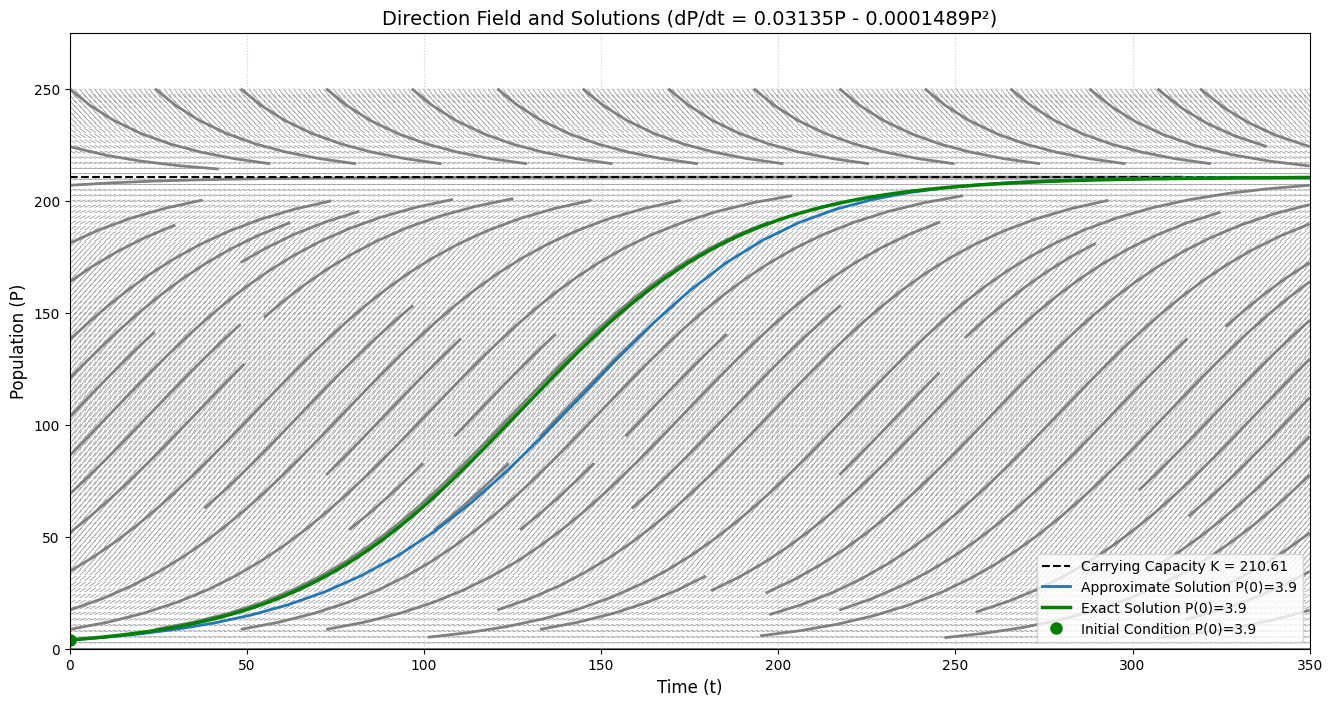

In [199]:
# --- Solution Parameters ---
t_final = 350
initial_conditions = [(0, 3.9)]

# Create a grid of x and y values
x = np.linspace(0, t_final, 250)
y = np.linspace(0, 250, 100)

# Create a meshgrid from x and y
X, Y = np.meshgrid(x, y)

# Calculate the slopes at each point in the grid
DYDX = logistic_ode(Y, X)

# Plot figure
plt.figure(figsize=(16, 8))

# Plot the direction field
plt.quiver(X, Y, np.ones_like(DYDX), DYDX, scale=200, color='gray', width=0.0005, headlength=1e-10, headaxislength=1e-10)
plt.streamplot(X, Y, np.ones_like(DYDX), DYDX, density=1, color='gray', linewidth=2, arrowsize=0)

# Plot the convergence line
plt.hlines(K, 0, t_final, color='black', linestyle='--', linewidth=1.5, label=f'Carrying Capacity K = {K:.2f}')

for initial_condition in initial_conditions:
    # Plot solution curves using isoclines method
    x_values = np.linspace(initial_condition[0], t_final, 35)

    y_values = [initial_condition[1]]
    for xi in x_values[1:]:
        yi = y_values[-1]
        y_next = yi + logistic_ode(yi, xi) * (x_values[1] - x_values[0])
        y_values.append(y_next)
    plt.plot(x_values, y_values, label=f'Approximate Solution P({initial_condition[0]})={initial_condition[1]}', linewidth=2)

    # Plot solution curves using odeint
    t_values_precise = np.linspace(initial_condition[0], t_final, 300) 
    P_solution_precise = odeint(logistic_ode, initial_condition[1], t_values_precise)[:, 0]
    
    plt.plot(t_values_precise, P_solution_precise, color='green', label=f'Exact Solution P({initial_condition[0]})={initial_condition[1]}', linewidth=2.5)

    # Plot the initial condition
    plt.plot(initial_condition[0], initial_condition[1], 'go', markersize=8, label=f'Initial Condition P({initial_condition[0]})={initial_condition[1]}')


# Title and Labels
plt.title(f'Direction Field and Solutions (dP/dt = {A}P - {B}P²)', fontsize=14)
plt.xlabel('Time (t)', fontsize=12)
plt.ylabel('Population (P)', fontsize=12)
plt.ylim(0, 1.1 * max(np.max(Y), K)) # Adjust Y limit to include K
plt.legend(loc='lower right')
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()

#### Análisis Cualitativo de la Convergencia (Población P vs. Tiempo t)

La convergencia en este modelo logístico se rige por la Capacidad de Carga (K) y se observa un patrón de crecimiento en forma de "S" (sigmoidal).

1. Punto de Equilibrio (Capacidad de Carga K)

- Identificación: La capacidad máxima (o de carga) se calcula como K=a/b ($\frac{dP}{dt} = a*P - b*P^2$). El gráfico indica $K = 210.54$.

- Comportamiento del Campo de Direcciones:

La línea horizontal discontinua negra en $P≈210.54$ representa una isoclina cero ($\frac{dP}{dt}=0$).

Los segmentos de dirección (flechas grises) a lo largo de esta línea son perfectamente horizontales. Esto indica que, una vez que la población alcanza $K$, el crecimiento se detiene ($\frac{dP}{dt}=0$).

- Estabilidad: El campo de direcciones muestra que:

Para $P<K$, las pendientes son positivas (el crecimiento empuja $P$ hacia arriba, acercándose a $K$).

Para $P>K$ (la parte superior del gráfico), las pendientes son negativas (el crecimiento se vuelve negativo, empujando $P$ hacia abajo, de vuelta hacia $K$).

- Conclusión: El punto $P=K$ es un punto de equilibrio estable o atractor. La población convergerá hacia él independientemente de la condición inicial (si $P_0​>0$).

2. Comportamiento de la Solución (Curva de Crecimiento Sigmoidal)

La curva de solución (verde) partiendo de la condición inicial $P(0)=3.9$ exhibe el crecimiento característico del modelo logístico:

- Fase de Inicio (Crecimiento Lento): De $t=0$ a $t≈50$. El crecimiento es lento ya que la población es pequeña ($P≪K$) y la escasez de población limita la reproducción (la función $0.03135P$ domina).

- Fase de Aceleración (Crecimiento Exponencial): De $t≈50$ a $t≈150$. La curva es convexa, y el crecimiento es casi exponencial. Esto ocurre porque la población es lo suficientemente grande para reproducirse rápidamente, y los recursos aún no son un factor limitante (el término cuadrático $−bP^2$ es pequeño).

- Punto de Inflexión (Crecimiento Máximo): Alrededor de $P=K/2≈105$. En este punto ($t≈150$), el crecimiento es máximo ($\frac{d^2P}{dx^2}​=0$). A partir de aquí, el factor limitante (la competencia por recursos, dada por $−bP^2$) se vuelve más significativo.

- Fase de Desaceleración y Convergencia: De $t≈200$ en adelante. La curva se vuelve cóncava, y la tasa de crecimiento disminuye rápidamente a medida que $P$ se acerca a $K$.

- Convergencia Asintótica: La solución se acerca a la línea $P=K$ de forma asintótica (nunca la cruza), demostrando que $\lim \limits_{t \to \infty}P(t) = K$. En el gráfico, la curva se vuelve prácticamente indistinguible de la línea $K$ después de $t≈300$.

3. Precisión Numérica

- Solución Aproximada (Azul) vs. Solución Exacta (Verde): Se observa que la Solución Aproximada (Método de Euler con un $\Delta t$ grande) subestima sistemáticamente el valor de la población durante la fase de crecimiento más rápido, desviándose de la solución exacta (Verde). Sin embargo, ambas curvas convergen cualitativamente hacia el mismo punto de equilibrio $K=210.54$.

[Este problema está basado en el modelo de Verhulst, quien en 1845 utilizó los datos de la
población de Estados Unidos del periodo 1790-1840 para predecir con precisión su evolución
hasta el año 1930 (por supuesto, mucho después de su propia muerte).]

### Planteamiento del Problema:

Para garantizar que nuestro problema esté bien planteado es suficiente y necesario garantizar las siguientes propiedades:
1. Existencia de la Solución
2. Unicidad de la Solución
3. Dependencia Continua de los Datos (Estabilidad Numérica)

En el caso de las EDOs, esta evaluación se basa en las tres condiciones de Hadamard que se aplican a los Problemas de Valor Inicial (PVI).

Para una EDO de primer orden de la forma general:

$$​y^′=f(t,y) \quad , \quad y(t_0​)=y_0$$

El problema se considera bien planteado si se cumplen las siguientes condiciones:

1. Existencia de la Solución (Teórica)

Debe haber al menos una función $y(t)$ que satisfaga la EDO y la condición inicial en la vecindad del punto inicial $(t_0​,y_0​)$.

Con el Criterio de Existencia (Teorema de Peano) es suficiente con demostrar que $f(t, y)$ es continua para asegurar que para cada problema con valores iniciales $y(x_0) = y_ 0$ para $f$ va a existir una solucion $z$ (no necesariamente única) tal que $​z^′=f(t,z) , z(x_0​)=y_0$.

Esto debido a que al integrar la EDO en el intervalo desde $x_0$ hasta $x$ obtenemos:

$$ \int_{x_0}^{​x​}y^′(t) = \int_{x_0}^{​x​}f(t,y(t))dt$$
$$y(x) - y_0 = \int_{x_0}^{​x​}f(t,y(t))dt$$
$$y(x) = y_0 ​+ \int_{x_0}^{​x​}f(t,y(t))dt$$

Y teniendo $f$ continua, la integral tiene solución (Por criterio de suficiencia de funciones Rienman-Integrables) y por tanto también la tiene la EDO.


2. Unicidad de la Solución (Teórica)

La solución debe ser única. Esta es la condición más estricta que excluye los casos donde múltiples curvas solución pasan por el mismo punto inicial.

Con el Criterio de Unicidad (Teorema de Picard-Lindelöf o Cauchy-Lipschitz) basta que tanto $f(t, y)$ como $\frac{\partial f}{\partial y}$ sean continuas para que la solución sea única.

Esto se debe a que si $\frac{\partial f}{\partial y}$​ es continua en un dominio cerrado y acotado (un rectángulo $R$), entonces la función $\frac{\partial f}{\partial y}$ está acotada en ese rectángulo, por lo que podemos decir que existe un valor máximo $L$ para $|\frac{\partial f}{\partial y}|$ en $R$.

Usando el Teorema del Valor Medio, esta acotacia garantiza que existe un $L$ (El valor máximo) tal que $|f(t, y_1) - f(t, y_2)| \leq L |y_1 - y_2|$ para $(t, y_1)$ y $(t, y_2)$ en ese dominio (Condición de Lipschitz)

Si existieran dos soluciones distintas $y_1(t)$ y $y_2(t)$ que parten del mismo punto inicial $y(x_0) = y_0$ con $(x_0, y_0)$ en el dominio $R$, al ser soluciones tenemos que $|y_1^′(x) - y_2^′(x)| = |f(t, y_1) - f(t, y_2)| \leq L |y_1 - y_2|$, por lo que se restringe la rapidez con que estas soluciones pueden separarse.

El Lema de Gronwall asegura que siendo $u(t)$ continua tal que $u(t) \leq A + B\int_{t_0}^tu(s)ds$ con $A$ y $B$ constantes positivas, entonces $u(t) \leq Ae^{B(t - t_0)}$. Esto se cumple al tomar una función auxiliar $v(t) = A + \epsilon + B\int_{t_0}^tu(s)ds$ para un $\epsilon > 0$ lo suficientemente pequeño, dado a que $u(t) < v(t)$ y al derivar $v(t)$ y resolver la EDO por Ecuaciones Separables respecto a t obtenemos:

$$\frac{dv}{dt} = Bu(t)$$
$$\frac{dv}{dt} \leq Bv$$
$$\frac{dv}{v} \leq Bdt$$
$$\int_{t_0}^t\frac{dv}{v} \leq \int_{t_0}^tBdt$$
$$ln(v)|_{t_0}^t \leq B(t - t_0)$$
$$ln(\frac{v(t)}{v(t_0)}) \leq B(t - t_0)$$
$$\frac{v(t)}{A} \leq e^{B(t - t_0)}$$
$$v(t) \leq  Ae^{B(t - t_0)}$$

Como $u(t) < v(t)$ para $\epsilon \to 0$ tenemos que $u(t) \leq  Ae^{B(t - t_0)}$ 

Al aplicar Lema de Gronwall con $u(t) = |y_1 - y_2|$ (como $y_1$ y $y_2$ continuas $u(t)$ continua) se llega a que $u(x) \leq L\int_{x_0}^xu(t)dt$ integrando la Condición de Lipschitz, de donde $A = 0$ por lo que $u(t) \leq 0$, por lo que llegamos a que $y_1 = y_2$ en $R$.

3. Estabilidad Numérica (Dependencia Continua de los Datos)

Esta es la condición crítica para el análisis numérico, ya que asegura que un pequeño error en la condición inicial (y0​) o en la propia función f (por ejemplo, por errores de redondeo) no cause una gran desviación en la solución final.

Para los Problemas de Valor Inicial (PVI), si se cumplen las condiciones de existencia y unicidad (Lipschitzianidad), la estabilidad suele estar garantizada de forma local (es decir, el problema es intrínsecamente bien planteado en un sentido estricto).

Supongamos que tenemos dos soluciones, $y_1​(x)$ y $y_2​(x)$, que parten de dos condiciones iniciales muy cercanas:

$$y_1​(x_0​) = y_0​$$

$$y_2​(x_0​) = y_0 ​+ \epsilon$$

Aquí, $\epsilon$ representa una perturbación inicial muy pequeña.

Si las soluciones tuvieran una fuerte inestabilidad local, significaría que la pequeña diferencia $\epsilon$ podría generar una gran diferencia en las soluciones inmediatamente después de $x_0$​.

Sin embargo, la Condición de Lipschitz, junto con el Lema de Gronwall, permite demostrar que $∣y_1​(x) − y_2​(x)∣ \leq ∣\epsilon∣e^{L∣x − x_0​∣}$. En esta fórmula la diferencia inicial ($\epsilon$) se multiplica por un factor de creciemiento finito ($e^{L∣x − x_0​∣}$), dado a que al mantenerse en un intervalo local y acotado al rededor de $x_0$ (donde $∣x − x_0​∣$ es pequeño y finito) el número $e^{L∣x − x_0​∣}$ es una constante finita. Por lo tanto si la perturbación inicial ($\epsilon$) es muy pequeña, la diferencia entre las soluciones $y_1​(x)$ y $y_2​(x)$ también será pequeña en ese entorno local

Notemos que aunque garanticemos la Estabilidad Numérica o Local, no podemos garantizar que las soluciones $y_1​(x)$ y $y_2​(x)$ garanticen Estabilidad Asintótica (Comportamiento de la Solución a Largo Plazo), dado a que no controla el comportamiento de las soluciones en el infinito ($x \to \infty$).

En conclusión, si en una EDO se demuestra que tanto $f(t, y)$ como $\frac{\partial f}{\partial y}$ son continuas, se puede asegurar que se cumple Existencia y Unicidad de las Soluciones, y por tanto también Estabilidad Numérica, de donde podemos garantizar que nuestro problema está Bien Planteado

¿Qué ocurre en nuestra EDO?

En el caso de nuestra EDO, $f(t, P) = 0.03135P − 0.0001489P^2$ y $\frac{df}{dP} = 0.03135 − 2*0.0001489P$ son ambos polinomios y por tanto continuos, así que es un problema bien planteado.

### Análisis numérico:

#### Condicionamiento del Problema:

Para considerar nuestro problema como bien condicionado $k(t)$ debe ser pequeño (no mucho mayor que 1), siendo $k(t)$:

$$k(t) = \left| \frac{\text{cambio relativo en }P(t)}{\text{cambio relativo en }P_0} \right| = \left| \frac{\frac{\delta P(t) - P(t)}{P(t)}}{\frac{\delta P_0 - P_0}{P_0}} \right| = \left| \frac{P_0}{P(t)}\frac{\delta P(t) - P(t)}{\delta P_0 - P_0} \right| ≈ \left| \frac{P_0}{P(t)}\frac{\partial P(t)}{P_0} \right|$$

Donde $P(t)$ y $\delta P(t)$ son soluciones de la EDO con valores iniciales $P(t_0) = P_0$ y $\delta P(t_0) = P_0 + \delta$.

Tomando una $t$ finita, como demostramos anteriormente la EDO cumple con la condición de Lipschitz, y junto al Lema de Gronwall podemos asegurar que $|\delta P(t) - P(t)| \leq |\delta|\epsilon^{L|t-t_0|}$. Usando esto en la penúltima forma de $k(t)$ obtenemos:

$$k(t) = \left| \frac{P_0}{P(t)}\frac{\delta P(t) - P(t)}{\delta P_0 - P_0} \right| = \left| \frac{P_0}{P(t)} \epsilon^{L|t-t_0|} \right|$$

Como tomamos $t$ finito, podemos asegurar que el miembro derecho de la igualdad es finito y acotado en función del tiempo trascurrido.

Ahora anlicemos el comportamiento de $k(t)$ cuando $t \to \infty$.

Usando la última forma de $k(t)$, tomemos $Q(t) = \frac{\partial P(t)}{P_0}$. Derivando la EDO original por $P_0$ obtenemos la EDO para $Q(t)$:

$$\frac{dQ}{dt} = \frac{\partial f(P(t))}{\partial P} Q(t) \quad , \quad Q(t_0) = 1$$

Resolviendo como Ecuación Separable se obtiene $Q(t) = exp(\int \limits_{t_0}^t \frac{\partial f(P(\tau))}{\partial P}d\tau)$ y $k(t) = \left| \frac{P_0}{P(t)}Q(t) \right|$.

Como $\frac{\partial f​(P)}{\partial P} = f^′(P) = 0.03135 − 2(0.0001489)P$, para saber si la perturbación crece o decae, debemos analizar el signo de $f^′(P)$ a lo largo de la solución $P(t)$.

$f(P)$ tiene dos puntos de equilibrio: $P = 0$ y $P = K = \frac{0.03135}{0.0001489} ​≈ 210.54$. El primero de ellos tiene derivada positiva, por lo que es un punto de equilibrio inestable o repulsor, es decir, cualquier perturbacion aleja la solución de 0; mientras que K tiene derivada negativa, por lo que es asintóticamente estable (atractor), es decir, si la solución comienza cerca de K o se dirige hacia K, las fuerzas del sistema la "arrastran" hacia ese valor.

Cuando $P < 105.27$ tenemos que $f^′(P) > 0$ por lo que las perturbaciones crecen exponencialmente, pero cuando $P > 105.27$ $f^′(P) < 0$ donde la solución final $P(t)$ converge al punto de equilibrio estable $K$

Dado que la condición inicial es $P(0) = 3.9$ y la solución converge a $K ≈ 210.54$, la trayectoria $P(t)$ tiene dos fases:

1. Fase de Crecimiento del Error (inicial): $P(t)$ va de $3.9$ a $105.27$. La integral acumula valores positivos.
2. Fase de Decaimiento del Error (dominante): $P(t)$ va de $105.27$ a $K$. La integral acumula valores negativos que, a largo plazo, son mayores en magnitud que los positivos iniciales.

En conclusión, cuando $t \to \infty$ dado al comportamiento asintóticamente estable del sistema tenemos que:

$$\lim \limits_{t \to \infty} Q(t) = \lim \limits_{t \to \infty} exp(-\infty) = 0$$

Además:

$$\lim \limits_{t \to \infty} \frac{P_0}{P(t)} = \frac{3.9}{210.54} \text{  Constante pequeña y finita}$$

De donde el número de condición se determina por $\lim \limits_{t \to \infty} k(t) ≈ (\text{Constante finita}) * 0 = 0$.

En conclusión, como en intervalos finitos $k(t)$ es finito y acotado en función del tiempo transcurrido, y además $\lim \limits_{t \to \infty} k(t)$ es pequeño, podemos asegurar que el problema está bien condicionado.

#### Algoritmos Numéricos:

##### Método de Euler Mejorado

##### Orden de Convergencia:
- $O(h^2)$ donde h es el tamaño del paso.
##### Complejidad computacional:
- $O(n)$ donde n es la cantidad de pasos a dar.

In [200]:
def improved_euler(f, x0, y0, h, xf):
    """
    Solve an ODE using the Improved Euler (Heun's) method.

    Parameters
    ----------
    f : callable
        The ODE function f(y, x) representing dy/dx = f(y, x).
    x0 : float
        Initial x value.
    y0 : float
        Initial y value.
    h : float
        Step size.
    xf : float
        Final x value.

    Returns
    -------
    tuple of (numpy.ndarray, numpy.ndarray)
        Arrays of x values and corresponding approximated y values.
    """
    n_steps = int(np.ceil((xf - x0) / h))

    x_points = np.zeros(n_steps + 1)
    y_points = np.zeros(n_steps + 1)

    x_points[0] = x0
    y_points[0] = y0

    for i in range(n_steps):
        x_i = x_points[i]
        y_i = y_points[i]

        # Predictor step
        slope1 = f(y_i, x_i)
        y_predict = y_i + h * slope1

        # Corrector step
        slope2 = f(y_predict, x_i + h)
        y_correct = y_i + (h / 2.0) * (slope1 + slope2)

        x_points[i + 1] = x_i + h
        y_points[i + 1] = y_correct

    return x_points, y_points

#### Método Runge Kutta de orden 4
##### Orden de Convergencia:
- $O(h^4)$ donde h es el tamaño del paso.
##### Complejidad computacional:
- $O(n)$ donde n es la cantidad de pasos a dar.

In [201]:
def runge_kutta_4(f, x0, y0, h, xf):
    """
    Solve an ODE using the 4th-order Runge-Kutta (RK4) method.

    Parameters
    ----------
    f : callable
        The ODE function f(y, x) representing dy/dx = f(y, x).
    x0 : float
        Initial x value.
    y0 : float
        Initial y value.
    h : float
        Step size.
    xf : float
        Final x value (target).

    Returns
    -------
    tuple of (numpy.ndarray, numpy.ndarray)
        Arrays of x values and corresponding approximated y values.
    """
    n_steps = int(np.ceil((xf - x0) / h))

    x_points = np.zeros(n_steps + 1)
    y_points = np.zeros(n_steps + 1)

    x_points[0] = x0
    y_points[0] = y0

    for i in range(n_steps):
        x = x_points[i]
        y = y_points[i]

        k1 = h * f(y, x)
        k2 = h * f(y + k1 / 2, x + h / 2)
        k3 = h * f(y + k2 / 2, x + h / 2)
        k4 = h * f(y + k3, x + h)

        y_new = y + (k1 + 2 * k2 + 2 * k3 + k4) / 6
        x_new = x + h


        x_points[i + 1] = x_new
        y_points[i + 1] = y_new

    return x_points, y_points

##### Método de Pasos Múltiples 

Los Métodos Lineales de Pasos Múltiples (LMM) son una clase de técnicas numéricas para la resolución de problemas de valor inicial de la forma $y^′ = f(t, y)$ como nuestra EDO, calculando la aproximación $y_{n+1}$ utilizando los valores previamente calculados de la solución $y$ y de la función derivada f en múltiples instantes anteriores:

$$y_{n+s} = \sum \limits_{j=0}^{s-1}\alpha_jy_{n+j} + h\sum \limits_{j=0}^s\beta_jf(t_{n+j}, y_{n+j})$$

donde $s$ es el número de pasos y $h$ el tamaño del paso.

En este caso utilizaremos una subclase de LMM conocida como métodos de Adams, caracterizada por usar únicamente el valor de $y$ del paso inmediato anterior ($\alpha _{s-1} = 1$ y $\alpha _j = 0$ para $j < s-1$)

La función f(t,y(t)) se aproxima mediante un polinomio interpolador de Lagrange (misma base para la selección de los coeficientes y demostración de orden de convergencia).

Esta clase de métodos a su vez está dividida en dos subclases más, que son:

1. Adams-Bashforth (AB): Métodos Explícitos

Los métodos Adams-Bashforth (AB) son explícitos (es decir $\beta _s​ = 0$).

- Derivación: El integrando $f(t,y(t))$ se interpola en los puntos anteriores conocidos al paso a calcular ($t_n$​, $t_{n−1}$​, …, $t_{n−s+1}$)​.

- Mecanismo: La fórmula resultante calcula $y_{n+1}$​ directamente utilizando solo información ya disponible.

- Propiedades: Un método AB de $s$ pasos alcanza un orden de precisión $p = s$ (Error Local de Truncamiento de $O(h^{s+1})$, y Error Global de $O(h^s)$). Son sencillos de implementar y requieren solo una evaluación de la función f por paso.

In [202]:
def adams_bashforth(f, t0, y0, h, tf, order=4, coeffs=None):
    """
    Solve an ODE using the Adams-Bashforth multi-step method.

    Parameters
    ----------
    f : callable
        The ODE function f(t, y).
    t0 : float
        Initial time value.
    y0 : float
        Initial y value.
    h : float
        Step size.
    tf : float
        Final time value.
    order : int, optional
        Order of the method (default is 4).
    coeffs : list of float, optional
        Adams-Bashforth coefficients (default uses order 4 coefficients).

    Returns
    -------
    list of tuple
        List of (t, y) pairs.
    """
    # Default coefficients for different orders
    default_coeffs = {
        1: [1],
        2: [3/2, -1/2],
        3: [23/12, -16/12, 5/12],
        4: [55/24, -59/24, 37/24, -9/24],
        5: [1901/720, -2774/720, 2616/720, -1274/720, 251/720]
    }

    if coeffs is None:
        if order not in default_coeffs:
            raise ValueError(f"Coefficients for AB order {order} not defined.")
        coeffs = default_coeffs[order]

    epsilon = h * 0.5
    n_total = int(round((tf - t0) / h))

    if n_total <= 0:
        return [(t0, y0)]

    # Generate starting values using RK4
    start_steps = min(order - 1, n_total)
    rk_f = (start_steps * h) + t0
    result_t, result_y = runge_kutta_4(f, t0, y0, h, rk_f)
    result = []
    for i in range(len(result_t)):
        result.append((result_t[i], result_y[i]))

    # Store function evaluations for multi-step formula
    func_evals = deque(maxlen=order)
    for t_i, y_i in reversed(result):
        if len(func_evals) < order:
            func_evals.append(f(t_i, y_i))

    t_current = result[-1][0]

    # Main Adams-Bashforth loop
    while tf - t_current > epsilon:
        y_n = result[-1][1]

        # Compute weighted sum of function evaluations
        weighted_sum = sum(coeffs[j] * func_evals[j] for j in range(order))

        t_next = t_current + h
        y_next = y_n + h * weighted_sum

        result.append((t_next, y_next))
        t_current = t_next

        # Update function evaluations
        func_evals.appendleft(f(t_next, y_next))

    return result


def multi_step_explicit(f, t0, y0, h, tf):
    """
    Solve an ODE using 4-step Adams-Bashforth method.

    Parameters
    ----------
    f : callable
        The ODE function f(t, y).
    t0 : float
        Initial time value.
    y0 : float
        Initial y value.
    h : float
        Step size.
    tf : float
        Final time value.

    Returns
    -------
    list of tuple
        List of (t, y) pairs.
    """
    return adams_bashforth(f, t0, y0, h, tf)

In [203]:
t_init, y_init = (0, 3.9)
steps = 0.1
t_end = 1

answer = multi_step_explicit(logistic_ode,t_init, y_init, steps, t_end)

# --- Format Configuration ---
# Column widths (adjust as needed)
WIDTH_T = 15
WIDTH_Y = 20
SEPARATOR = '-' * (WIDTH_T + WIDTH_Y + 5) # 5 for the 3 spaces and 2 pipes

# --- Table Header ---
print("\n" + SEPARATOR)
print(f"| {'Step (i)':<5} | {'Time (t)':<{WIDTH_T-2}} | {'y_approx':<{WIDTH_Y-2}} |")
print(SEPARATOR)

# --- Table Body ---
for i, (t, y) in enumerate(answer):
    # Format output to align decimals with 12 decimal precision
    # f-string: < left align; .12f uses 12 decimals; > right align (for i)
    print(f"| {i:<5} | {t:<{WIDTH_T-2}.12f} | {y:<{WIDTH_Y-2}.12f} |")

# --- Table Footer ---
print(SEPARATOR)
print(f"Total points calculated: {len(answer)} (from t={t_init} to t={t} with h={steps})")
print(SEPARATOR)


----------------------------------------
| Step (i) | Time (t)      | y_approx           |
----------------------------------------
| 0     | 0.000000000000 | 3.900000000000     |
| 1     | 0.100000000000 | 3.912018153807     |
| 2     | 0.200000000000 | 3.924072639216     |
| 3     | 0.300000000000 | 3.936163561719     |
| 4     | 0.400000000000 | 3.948291027088     |
| 5     | 0.500000000000 | 3.949698749455     |
| 6     | 0.600000000000 | 3.951418482822     |
| 7     | 0.700000000000 | 3.953449929388     |
| 8     | 0.800000000000 | 3.955792791355     |
| 9     | 0.900000000000 | 3.958446770922     |
| 10    | 1.000000000000 | 3.961411570288     |
----------------------------------------
Total points calculated: 11 (from t=0 to t=0.9999999999999999 with h=0.1)
----------------------------------------


Este algoritmo tiene una complejidad computacional de $O(pN)$ siendo $p$ el número de pasos por iteración y $N$ el número de iteraciones necesarias (aprox $\frac{t - t_0}{h}$).

Pero al ser $p$ un pequeño valor constante del algoritmo que se use y estar la complejidad computacional de este dominada por el número de evaluaciones de $f$, podemos decir que es $O(N)$ (lineal respecto a la cantidad de pasos).

Por otro lado ya habíamos establecido un orden de convergencia de $p$: en el caso de AB4, $p = 4$ con Error Global de $O(h^4)$.

2. Adams-Moulton (AM): Métodos Implícitos

Los métodos Adams-Moulton (AM) son implícitos (es decir $\beta _s​\neq 0$).

- Derivación: El integrando $f(t,y(t))$ se interpola incluyendo el punto actual desconocido $t_{n+1}$​ junto con los puntos anteriores ($t_n$​, $t_{n−1}$​, …, $t_{n−s+1}$​​​).

- Mecanismo: La fórmula resultante requiere resolver una ecuación (implícita) para $y_{n+1}$​, ya que $f(t_{n+1}, y_{n+1})$​ depende de $y_{n+1}$​.

- Propiedades: Un método AM de $s$ pasos alcanza un orden de precisión $p = s+1$ (Error Local de Truncamiento de $O(h^{s+2})$, y Error Global de $O(h^{s+1})$), lo que los hace inherentemente más precisos. Son también más estables (mejor comportamiento para EDOs rígidas, o stiff).

Esquema Predictor-Corrector (ABM)

La implementación más eficiente y práctica es el esquema Predictor-Corrector (P-C), que utiliza un método AB de orden $p$ como Predictor para estimar $\tilde{y}_{n+1}$​, y un método AM de orden $p+1$ como Corrector para refinar el resultado:

- Predicción (P): $\tilde{y}_{n+1}$ $​\leftarrow$ AB (orden $p$)

- Evaluación (E): $\tilde{f}_{n+1}$ $​\leftarrow$ $f(t_{n+1}​,\tilde{y}_{​n+1}​)$

- Corrección (C): $y_{n+1}$ $​\leftarrow$ AM (orden $p+1$) utilizando $\tilde{f}_{​n+1}$​ en lugar de $f_{n+1​}$.

Este enfoque ABM (Adams-Bashforth-Moulton) aprovecha la alta precisión y estabilidad del corrector implícito sin el costo computacional de resolver la ecuación no lineal en cada paso.

In [204]:
def _one_step_ab(h, y_n, func_evals, order, coeffs):
    """
    Compute one Adams-Bashforth step (used as predictor in ABM).

    Parameters
    ----------
    h : float
        Step size.
    y_n : float
        Current y value.
    func_evals : deque
        Recent function evaluations [f_n, f_{n-1}, ..., f_{n-p+1}].
    order : int
        Order of the method.
    coeffs : list of float
        Adams-Bashforth coefficients.

    Returns
    -------
    float
        Predicted y value at next step.
    """
    default_coeffs = {
        1: [1],
        2: [3/2, -1/2],
        3: [23/12, -16/12, 5/12],
        4: [55/24, -59/24, 37/24, -9/24],
        5: [1901/720, -2774/720, 2616/720, -1274/720, 251/720]
    }

    if coeffs is None:
        if order not in default_coeffs:
            raise ValueError(f"Coefficients for AB order {order} not defined.")
        coeffs = default_coeffs[order]

    weighted_sum = sum(coeffs[j] * func_evals[j] for j in range(order))
    return y_n + h * weighted_sum


def adams_bashforth_moulton(f,t0, y0, h, tf, order=4, am_coeffs=None, ab_coeffs=None):
    """
    Solve an ODE using the Adams-Bashforth-Moulton predictor-corrector method.

    Parameters
    ----------
    f : callable
        The ODE function f(t, y).
    t0 : float
        Initial time value.
    y0 : float
        Initial y value.
    h : float
        Step size.
    tf : float
        Final time value.
    order : int, optional
        Order of the predictor (default is 4).
    am_coeffs : list of float, optional
        Adams-Moulton coefficients (default uses order 5 coefficients).
    ab_coeffs : list of float, optional
        Adams-Bashforth coefficients (default uses order 4 coefficients).

    Returns
    -------
    list of tuple
        List of (t, y) pairs.
    """
    # Default Adams-Moulton coefficients (corrector, one order higher)
    default_am = {
        1: [1/2, 1/2],
        2: [5/12, 8/12, -1/12],
        3: [9/24, 19/24, -5/24, 1/24],
        4: [251/720, 646/720, -264/720, 106/720, -19/720],
        5: [475/1440, 1427/1440, -798/1440, 482/1440, -173/1440, 27/1440]
    }

    # Default Adams-Bashforth coefficients (predictor)
    default_ab = {
        1: [1],
        2: [3/2, -1/2],
        3: [23/12, -16/12, 5/12],
        4: [55/24, -59/24, 37/24, -9/24],
        5: [1901/720, -2774/720, 2616/720, -1274/720, 251/720]
    }

    if am_coeffs is None:
        if order not in default_am:
            raise ValueError(f"Coefficients for AM order {order + 1} not defined.")
        am_coeffs = default_am[order]

    if ab_coeffs is None:
        if order not in default_ab:
            raise ValueError(f"Coefficients for AB order {order} not defined.")
        ab_coeffs = default_ab[order]

    epsilon = h * 0.5
    n_total = int(round((tf - t0) / h))

    if n_total <= 0:
        return [(t0, y0)]

    # Generate starting values using RK4
    start_steps = min(order - 1, n_total)
    rk_f = (start_steps * h) + t0
    result_t, result_y = runge_kutta_4(f, t0, y0, h, rk_f)
    result = []
    for i in range(len(result_t)):
        result.append((result_t[i], result_y[i]))

    # Store function evaluations
    func_evals = deque(maxlen=order)
    for t_i, y_i in reversed(result):
        if len(func_evals) < order:
            func_evals.append(f(t_i, y_i))

    t_current = result[-1][0]

    # Main predictor-corrector loop
    while tf - t_current > epsilon:
        y_n = result[-1][1]
        t_next = t_current + h

        # Predictor step (Adams-Bashforth)
        y_predict = _one_step_ab(h, y_n, func_evals, order, ab_coeffs)

        # Corrector step (Adams-Moulton)
        weighted_sum = am_coeffs[0] * f(t_next, y_predict)
        for j in range(order):
            weighted_sum += am_coeffs[j + 1] * func_evals[j]

        y_correct = y_n + h * weighted_sum

        result.append((t_next, y_correct))
        t_current = t_next

        # Update function evaluations
        func_evals.appendleft(f(t_next, y_correct))

    return result


def multi_step_implicit(f, t0, y0, h, tf):
    """
    Solve an ODE using 4-step Adams-Bashforth-Moulton method.

    Parameters
    f : callable, optional
        The ODE function f(t, y). Defaults to logistic_ode.
    ----------
    t0 : float
        Initial time value.
    y0 : float
        Initial y value.
    h : float
        Step size.
    tf : float
        Final time value.

    Returns
    -------
    list of tuple
        List of (t, y) pairs.
    """
    if f is None:
        f = logistic_ode
    return adams_bashforth_moulton(f, t0, y0, h, tf)

In [205]:
t_init, y_init = (0, 3.9)
steps = 0.1
t_end = 1

answer = multi_step_implicit(logistic_ode,t_init, y_init, steps, t_end)

# --- Format Configuration ---
# Column widths (adjust as needed)
WIDTH_T = 15
WIDTH_Y = 20
SEPARATOR = '-' * (WIDTH_T + WIDTH_Y + 5) # 5 for the 3 spaces and 2 pipes

# --- Table Header ---
print("\n" + SEPARATOR)
print(f"| {'Step (i)':<5} | {'Time (t)':<{WIDTH_T-2}} | {'y_approx':<{WIDTH_Y-2}} |")
print(SEPARATOR)

# --- Table Body ---
for i, (t, y) in enumerate(answer):
    # Format output to align decimals with 12 decimal precision
    # f-string: < left align; .12f uses 12 decimals; > right align (for i)
    print(f"| {i:<5} | {t:<{WIDTH_T-2}.12f} | {y:<{WIDTH_Y-2}.12f} |")

# --- Table Footer ---
print(SEPARATOR)
print(f"Total points calculated: {len(answer)} (from t={t_init} to t={t} with h={steps})")
print(SEPARATOR)


----------------------------------------
| Step (i) | Time (t)      | y_approx           |
----------------------------------------
| 0     | 0.000000000000 | 3.900000000000     |
| 1     | 0.100000000000 | 3.912018153807     |
| 2     | 0.200000000000 | 3.924072639216     |
| 3     | 0.300000000000 | 3.936163561719     |
| 4     | 0.400000000000 | 3.948291027088     |
| 5     | 0.500000000000 | 3.949698749455     |
| 6     | 0.600000000000 | 3.951418482822     |
| 7     | 0.700000000000 | 3.953449929388     |
| 8     | 0.800000000000 | 3.955792791355     |
| 9     | 0.900000000000 | 3.958446770922     |
| 10    | 1.000000000000 | 3.961411570288     |
----------------------------------------
Total points calculated: 11 (from t=0 to t=0.9999999999999999 with h=0.1)
----------------------------------------


Este algoritmo se diferencia del método Adams-Bashforth solamente en que en cada iteracion se calcula además aprox_y_next que tiene complejidad $O(p)$ y $f$(x_next, aprox_y_next) con $O(1)$, por lo que tiene una complejidad computacional de $O(2pN)$ siendo $p$ el número de pasos por iteración y $N$ el número de iteraciones necesarias (aprox $\frac{t - t_0}{h}$).

Por la misma razón que en el caso anterior podemos concluir a que tiene complejidad $O(N)$ o lineal respecto a número de pasos.

Por otro lado el orden de convergencia es de $p+1$: en el caso de ABM4, $p = 4$ con Error Global de $O(h^5)$ (quinto orden).

(Comparación entre los algoritmos anteriores y uso de benchmark para análisis de precisión)



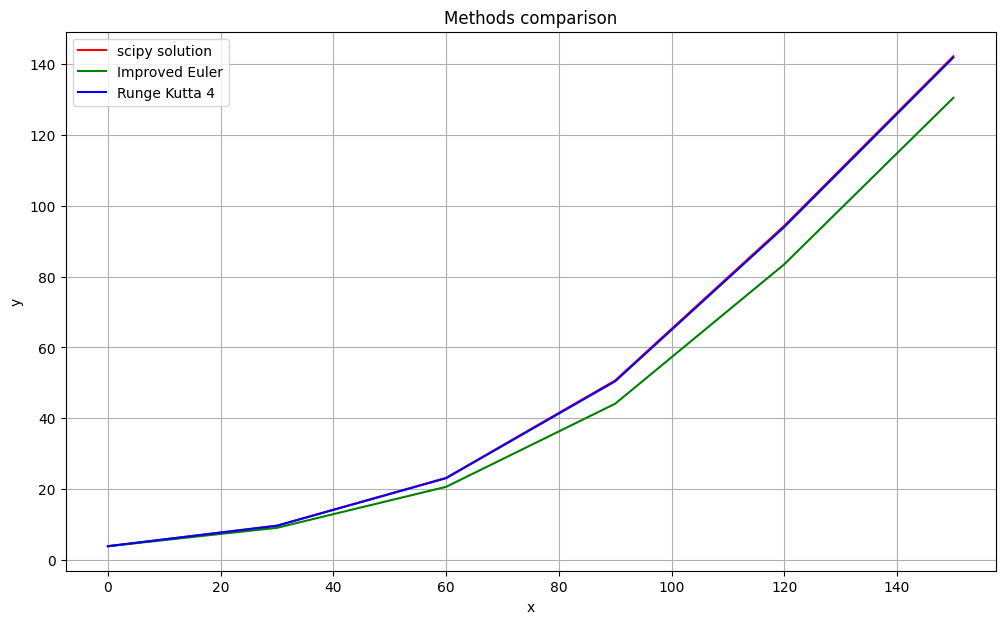

In [206]:
# Parameters
x0 = 0
y0 = 3.9
xf = 130
h = 30

t_span = np.arange(x0, xf + h, h)

analytical_solution = [logistic_analytical(t) for t in t_span]

# Scipy solution
scipy_solution = odeint(logistic_ode, y0, t_span).flatten()

# Add other methods here
x_improved_euler, y_improved_euler = improved_euler(logistic_ode, x0, y0, h, xf)
x_runge_kutta_4, y_runge_kutta_4 = runge_kutta_4(logistic_ode, x0, y0, h, xf)

plt.figure(figsize=(12, 7))
plt.plot(t_span, scipy_solution, 'r-', label='scipy solution')
plt.plot(t_span, y_improved_euler, 'g-', label='Improved Euler')
plt.plot(t_span, y_runge_kutta_4, 'b-', label='Runge Kutta 4')
plt.title('Methods comparison')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

#### Análisis del Error:

##### Benchmmarks:

In [207]:
# Benchmark: Comparison of numerical methods with analytical solution

# Exact analytical solution for t=140 years
ANALYTICAL_RESULT_140 = 126.949969861

# Problem parameters
P0 = 3.9  # Initial population in millions (1790 US Census)
t_span = np.linspace(0, 140, 141)  # Time span from 0 to 140 years

# Solution using scipy.odeint
scipy_solution = odeint(logistic_ode, P0, t_span)

print("=== NUMERICAL METHODS BENCHMARK ===")
print(f"Analytical solution (t=140): {ANALYTICAL_RESULT_140:.6f} millions")
print(f"SciPy odeint solution (t=140): {scipy_solution[-1][0]:.6f} millions")

=== NUMERICAL METHODS BENCHMARK ===
Analytical solution (t=140): 126.949970 millions
SciPy odeint solution (t=140): 127.008330 millions


Realizar análisis de error: error relativo, análisis hacia adelante (perturbaciones en datos) y
hacia atrás (estabilidad del algoritmo)



Comparing methods with LINEAR error scale


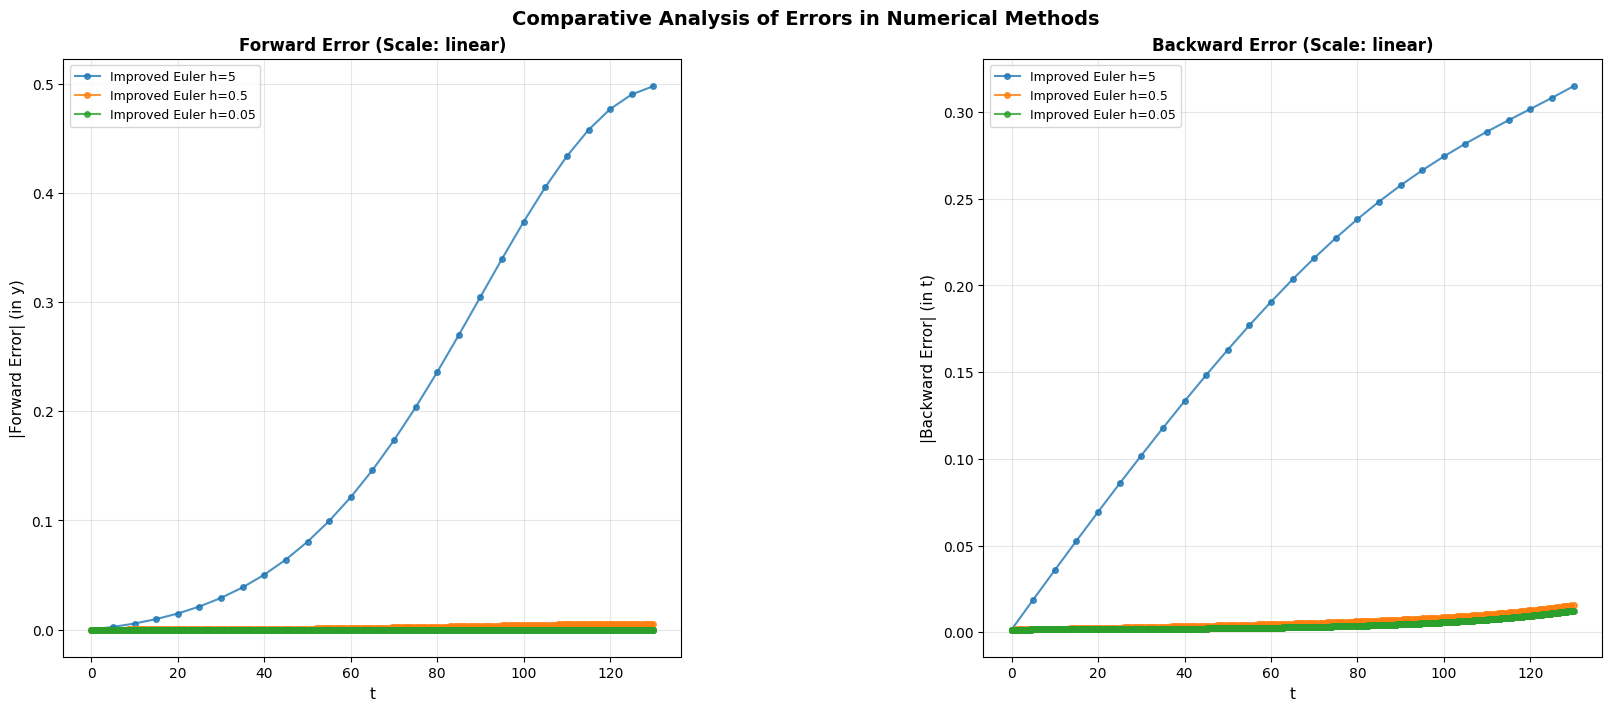


Comparing methods with LOGARITHMIC error scale


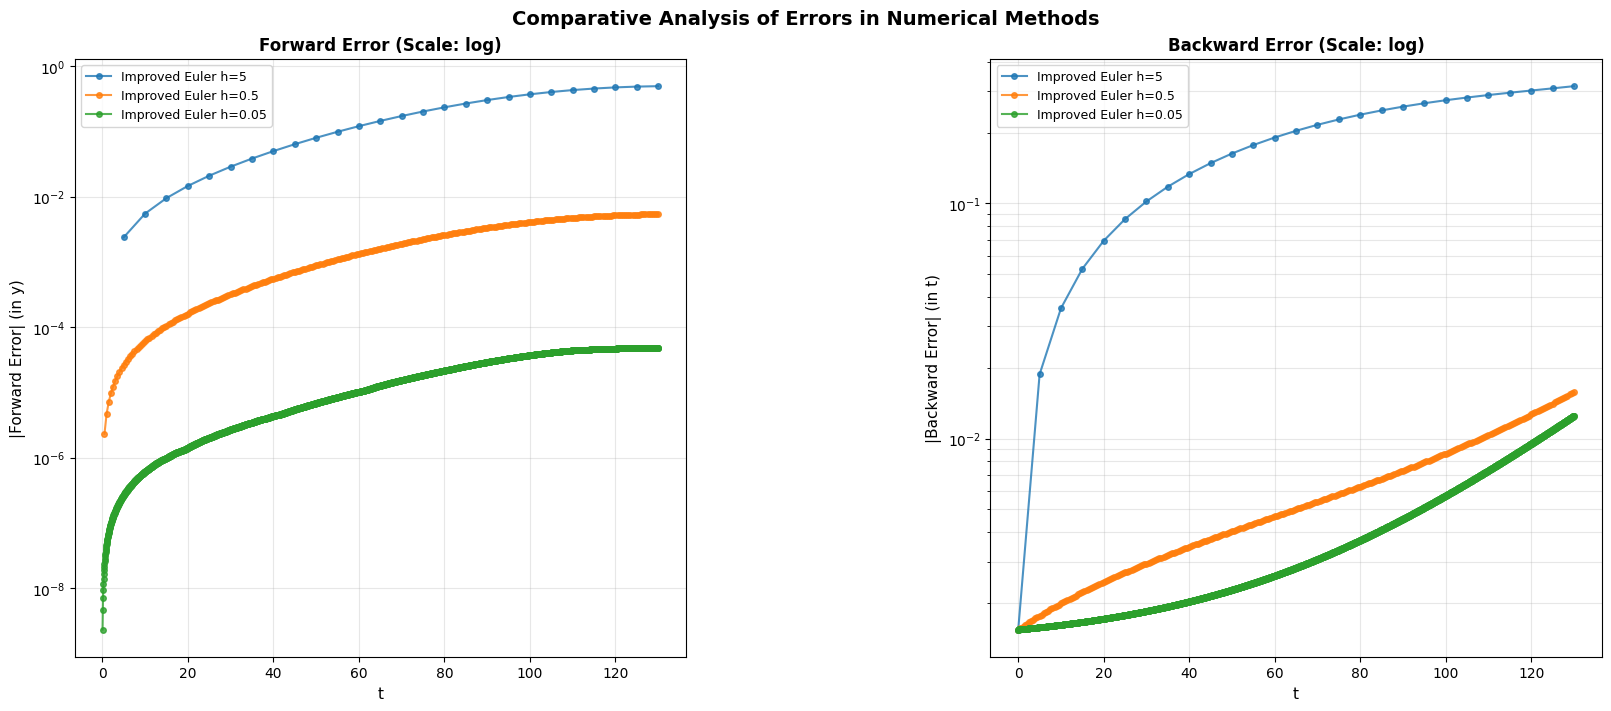

In [208]:
def compare_numerical_methods(f, f_inv, t0, y0, tf, methods_config, scale='log'):
    """
    Compares multiple numerical methods and plots their errors.

    Parameters:
    -----------
    f : callable
        Function dy/dt = f(y, t).  Must accept (y, t) for odeint compatibility.
    f_inv : callable
        Function t = f_inv(y).  Must accept y and return t (np.arrays).
    t0, y0, tf : float
        Initial conditions and time limit.
    methods_config : list of dict
        Configuration for the methods to be compared.
        Example: [
            {'name': 'Improved Euler', 'method': improved_euler, 'h': 0.1},
            {'name': 'RK4', 'method': rk4, 'h': 0.1}
        ]
    scale : str, optional
        The scale for the y-axis of the error plots. Can be 'linear' or 'log'.  Defaults to 'log'.

    Returns:
    --------
    dict : Results containing time arrays, solutions, and step sizes for each method.
    """
    # Validate scale parameter
    if scale not in ('linear', 'log'):
        raise ValueError(f"scale must be 'linear' or 'log', got '{scale}'")

    h_ref = 0.001
    t_ref = np.arange(t0, tf + h_ref, h_ref)
    y_ref = odeint(f, y0, t_ref).flatten()

    # Use constrained_layout instead of tight_layout to avoid GridSpec incompatibility
    fig = plt. figure(figsize=(16, 7), constrained_layout=True)

    # Removed hspace since there's only 1 row (it has no effect)
    gs = GridSpec(1, 2, figure=fig, wspace=0.3)

    # Generate distinct colors - use range(n) to avoid repeating the first color
    num_methods = len(methods_config)
    colors = plt.cm.tab10(np.arange(num_methods) % 10)  # Cycle through 10 colors

    # --- Calculate Numerical Solutions ---
    results = {}
    for config in methods_config:
        name = config['name']
        method = config['method']
        h = config['h']
        t_num, y_num = method(f, t0, y0, h, tf)
        results[name] = {'t': t_num, 'y': y_num, 'h': h}

    # ========== PLOT 1: Forward Error at Each Step ==========
    ax1 = fig.add_subplot(gs[0, 0])

    for idx, config in enumerate(methods_config):
        name = config['name']
        t_num = results[name]['t']
        y_num = results[name]['y']

        y_ref_interp = np.interp(t_num, t_ref, y_ref)
        forward_error = np.abs(y_num - y_ref_interp)

        if scale == 'log':
            # Use np.where to handle zeros more cleanly
            plot_data = np.where(forward_error == 0, np.nan, forward_error)
            ax1.semilogy(t_num, plot_data, 'o-', label=name, color=colors[idx], markersize=4, alpha=0.8)
        else:
            ax1.plot(t_num, forward_error, 'o-', label=name, color=colors[idx], markersize=4, alpha=0.8)

    ax1.set_xlabel('t', fontsize=11)
    ax1.set_ylabel('|Forward Error| (in y)', fontsize=11)
    ax1.set_title(f'Forward Error (Scale: {scale})', fontsize=12, fontweight='bold')
    ax1.legend(loc='best', fontsize=9)
    ax1.grid(True, alpha=0.3, which='both')

    # ========== PLOT 2: Backward Error at Each Step ==========
    ax2 = fig.add_subplot(gs[0, 1])

    for idx, config in enumerate(methods_config):
        name = config['name']
        t_num = results[name]['t']
        y_num = results[name]['y']

        t_inv = f_inv(y_num)
        backward_error = np. abs(t_num - t_inv)

        if scale == 'log':
            plot_data = np.where(backward_error == 0, np.nan, backward_error)
            ax2.semilogy(t_num, plot_data, 'o-', label=name, color=colors[idx], markersize=4, alpha=0.8)
        else:
            ax2.plot(t_num, backward_error, 'o-', label=name, color=colors[idx], markersize=4, alpha=0.8)

    ax2.set_xlabel('t', fontsize=11)
    ax2.set_ylabel('|Backward Error| (in t)', fontsize=11)
    ax2. set_title(f'Backward Error (Scale: {scale})', fontsize=12, fontweight='bold')
    ax2.legend(loc='best', fontsize=9)
    ax2.grid(True, alpha=0.3, which='both')

    fig.suptitle('Comparative Analysis of Errors in Numerical Methods', fontsize=14, fontweight='bold')

    # No need for tight_layout when using constrained_layout
    plt.show()

    return results

# ============================================================================
# USAGE EXAMPLE
# ============================================================================

if __name__ == "__main__":

    # Initial conditions
    t0 = 0
    y0 = 3.9
    tf = 130

    # Compare the same method with different step sizes (h)
    methods_h_config = [
        {'name': 'Improved Euler h=5', 'method': improved_euler, 'h': 5},
        {'name': 'Improved Euler h=0.5', 'method': improved_euler, 'h': 0.5},
        {'name': 'Improved Euler h=0.05', 'method': improved_euler, 'h': 0.05},
    ]

    # --- Generate plot with LINEAR scale ---
    print("\nComparing methods with LINEAR error scale")
    compare_numerical_methods(logistic_ode, logistic_ode_inverse, t0, y0, tf, methods_h_config, scale='linear')

    # --- Generate plot with LOGARITHMIC scale ---
    print("\nComparing methods with LOGARITHMIC error scale")
    compare_numerical_methods(logistic_ode, logistic_ode_inverse, t0, y0, tf, methods_h_config, scale='log')